# Методы сбора и обработки данных из сети Интернет
## Open data
#### 1.	Создать приложение, которое будет из готового файла с данными «Сбербанка» (https://www.sberbank.com/ru/analytics/opendata) выводить результат по параметрам:
* Тип данных
* Интервал дат
* Область

#### 2.	Визуализировать выводимые данные с помощью графика

### Если вы запускаете этот файл в локальном Jupyter Notebook или JupyterLab

Для интерактивного просмотра используется **IPywidgets**

`pip install ipywidgets`

Далее для активации IPywidgets в Jupyter Notebook выполняем:

`jupyter nbextension enable --py widgetsnbextension`

А для использования в JupyterLab:

`jupyter labextension install @jupyter-widgets/jupyterlab-manager`

Ниже пример для Jupyter Notebook

In [1]:
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
!pip install -U -q pandas
!pip install -U -q matplotlib

### Практическая работа



In [3]:
import pandas as pd

import ipywidgets as widgets
from ipywidgets import interact

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Создаем DataFrame, конвертируем строку с датой в Datetime.

In [4]:
df = pd.read_csv('http://sbrfdata.ru/opendata.zip', encoding='windows-1251')
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")

Строим списки уникальных значений регионов и метрик.

In [5]:
metrics = df.name.unique()
regions = df.region.unique()

И сам динамический график

In [6]:
def draw_plot(metrics, region, start_date, end_date):
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    df_plot = df[(df.name == metrics) & 
             (df.region == region) & 
             (df.date >= start_date) &
             (df.date <= end_date)]
    
    x = list(df_plot.date)
    y = list(df_plot.value)
    
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.set_title(f'{region} - {metrics}')
    ax.plot_date(x, y, linestyle='-')
    
    for i in range(len(x)):
        ax.annotate(y[i], (mdates.date2num(x[i]), y[i]), ha="right", va="center",
                    xytext=(20, 15), textcoords='offset points', bbox=dict(boxstyle="round", fc="w", ec="k"))
    
    plt.show()
    
_ = interact(draw_plot, 
             metrics=widgets.Dropdown(options=list(metrics)),
             region=widgets.Dropdown(options=list(regions)), 
             start_date = widgets.DatePicker(value=pd.to_datetime('2018-01-01')), 
             end_date = widgets.DatePicker(value=pd.to_datetime('2019-01-01')))

interactive(children=(Dropdown(description='metrics', options=('Количество заявок на потребительские кредиты',…

## На случай, если интерактивный режим не работает

Можно запустить построение графика вручную в конце файла.

In [8]:
print(*[f'{i}: {metric}' for i, metric in enumerate(metrics)], sep='\n')

0: Количество заявок на потребительские кредиты
1: Средняя сумма заявки на потребительский кредит
2: Количество заявок на ипотечные кредиты
3: Средняя сумма заявки на ипотечный кредит
4: Количество новых депозитов
5: Средняя сумма нового депозита
6: Средняя зарплата
7: Средняя пенсия
8: В среднем руб. на текущем счете на человека
9: В среднем депозитов в руб. на человека
10: Средние расходы по картам
11: Средний чек в формате Фастфуд
12: Средний чек в формате Ресторан
13: Средние траты в ресторане фастфуд
14: Средние траты в ресторане


In [9]:
print(*[f'{i}: {region}' for i, region in enumerate(regions)], sep='\n')

0: Россия
1: Алтайский край
2: Амурская область
3: Архангельская область
4: Астраханская область
5: Белгородская область
6: Брянская область
7: Владимирская область
8: Волгоградская область
9: Вологодская область
10: Воронежская область
11: Еврейская автономная область
12: Забайкальский край
13: Ивановская область
14: Иркутская область
15: Кабардино-Балкарская Республика
16: Калининградская область
17: Калужская область
18: Камчатский край
19: Кемеровская область
20: Кировская область
21: Костромская область
22: Краснодарский край
23: Красноярский край
24: Курганская область
25: Курская область
26: Ленинградская область
27: Липецкая область
28: Магаданская область
29: Москва
30: Московская область
31: Мурманская область
32: Ненецкий автономный округ
33: Нижегородская область
34: Новгородская область
35: Новосибирская область
36: Омская область
37: Оренбургская область
38: Орловская область
39: Пензенская область
40: Пермский край
41: Приморский край
42: Псковская область
43: Республика

#### Соответствие индексов и значений выше.
Для примера используется
* `metrics[6]` - Средняя зарплата
* `regions[14]` - Иркутская область

Даты можно задавать произвольно, но в верном формате `yyyy-mm-dd`

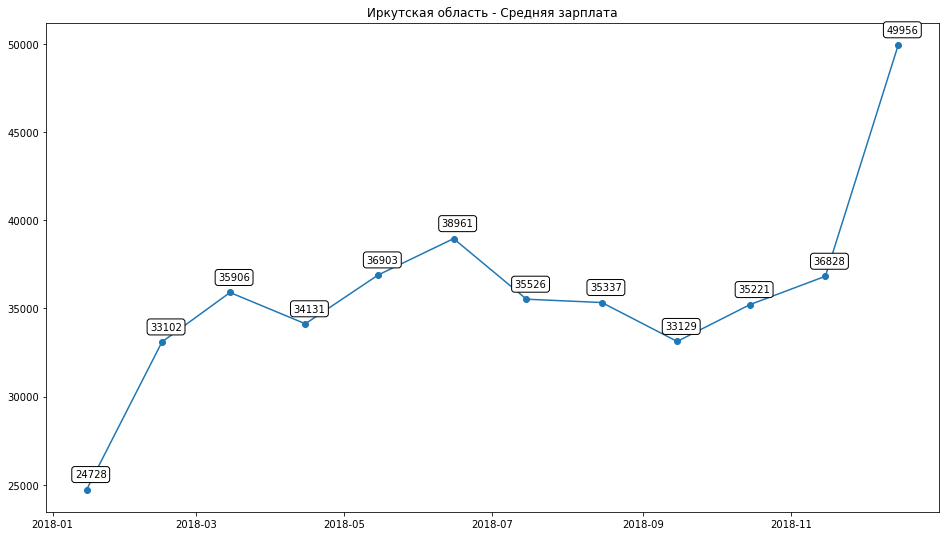

In [10]:
draw_plot(metrics[6], regions[14], pd.to_datetime('2018-01-01'), pd.to_datetime('2019-01-01'))